NAME: __TODO: Naveen Jajapur__

# Machine Learning Practice - Live
## Homework E: Regression 

### Data set
The BMI (Brain Machine Interface) data are stored in a single pickle file; within this file, there is one dictionary that contains all of the data.  The keys are: 'MI', 
'theta', 'dtheta', 'ddtheta', 'torque', and 'time'.  Each of these objects are python lists with 20 
numpy matrices; each matrix contains an independent fold of data, with rows representing 
different samples and columns representing different features.  The samples are organized 
contiguously (one sample every 50ms), but there are gaps in the data.
* _MI_ contains the data for 48 neurons.  Each row encodes the number of action potentials for 
each neuron at each of 20 different time bins (so, 48 x 20 = 960 columns).  
* _theta_ contains the angular position of the shoulder (in column 0) and the elbow 
(in column 1) for each sample.  
* _dtheta_ contains the angular velocity of the shoulder (in column 0) and the elbow 
(in column 1) for each sample.  
* _ddtheta_ contains the angular acceleration of the shoulder (in column 0) and the elbow 
(in column 1) for each sample. 
* _torque_ contains the torque of the shoulder (in column 0) and the elbow (in column 1) for each sample.  
* _time_ contains the actual time stamp of each sample.

A fold is a subset of the available data.  Each fold contains independent time points.

This assignment uses code examples and concepts from the lectures on regression 

### Task
For this assignment you will use *regression* to make predictions about arm motion given the neural activity.  In addition, you will work with different training set sizes and evaluating the training and validation performance of your models. 

It is also good practice to have a high level understanding of the data one is working with, thus upon loading the data, we will also display aspects of the data. 


### Objectives
* Understand the essentials of linear regression:
  + Prediction
  + Performance Evaluation
* Understand the impact of the training set size on model quality

### Instructions
* All Homework must be individual work.  Do not look at or copy solutions of other students or that are available on the Internet or via LLMs
* Only work in a copy of the file that is from your ~/homework_in/ directory
   + __If you do not use your own copy of this file, then it is an automatic zero on the assignment__
* Read the code below 
* For any cell that is flagged as *TODO*, complete the code according to the specifications
* Execute each cell and verify that it is showing correct results.  Note that because we are reusing variables, the order of execution is *really* important.
* Hand-In Procedure
  + Make sure that your notebook has been saved.  You are responsible for ensuring that the copy that you submit is current and complete
  + The name of the file should be the same as what we gave you
  + Download this file to your local machine (extension: .ipynb)
  + Submit to the Gradescope Notebook HWE dropbox
 
### General References
* [Python Built-in Functions](https://docs.python.org/3/library/functions.html)
* [Python Data Structures](https://docs.python.org/3/tutorial/datastructures.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [Summary of matplotlib](https://matplotlib.org/3.1.1/api/pyplot_summary.html)
* [Pandas DataFrames](https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_reference_api_pandas.DataFrame.html&d=DwMD-g&c=qKdtBuuu6dQK9MsRUVJ2DPXW6oayO8fu4TfEHS8sGNk&r=9ngmsG8rSmDSS-O0b_V0gP-nN_33Vr52qbY3KXuDY5k&m=mcOOc8D0knaNNmmnTEo_F_WmT4j6_nUSL_yoPmGlLWQ&s=h7hQjqucR7tZyfZXxnoy3iitIr32YlrqiFyPATkW3lw&e=)
* [Sci-kit Learn Linear Models](https://scikit-learn.org/stable/api/sklearn.linear_model.html)
* [Sci-kit Learn Metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html)
   * [Sci-kit Learn Variance Explained Metric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html)
* [Torque](https://en.wikipedia.org/wiki/Torque)
* [Velocity](https://en.wikipedia.org/wiki/Velocity)



In [149]:
import pandas as pd
import numpy as np
import pickle as pkl
import scipy.stats as stats
import os, re, fnmatch
import matplotlib.pyplot as plt
import matplotlib.patheffects as peffects
import copy

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.linear_model import Ridge
import scipy


# Default figure parameters
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline


# LOAD DATA

In [150]:
""" TODO
Load the BMI data from all the folds
"""
fname = '/mlp/datasets/bmi/bmi_dataset.pkl'

# Load the data
with open(fname, 'rb') as f:
    bmi = pkl.load(f)

    # TODO: finish extracting the MI data folds (other folds provided)
    theta_folds = bmi['theta']
    dtheta_folds =  bmi['dtheta']# TODO
    ddtheta_folds =  bmi['ddtheta']# TODO
    torque_folds = bmi['torque']# TODO
    time_folds =  bmi['time']# TODO
    MI_folds = bmi['MI']# TODO


    nfolds = len(MI_folds)
    print('Number of folds:', nfolds)
    
   


Number of folds: 20


In [151]:
"""
TODO

Print out the number of examples in each fold
- Print one fold per line
"""
for i in range(nfolds):
        fold_size = len(MI_folds[i])
        print("Fold", i + 1, ":", fold_size, "examples")
# TODO


Fold 1 : 1193 examples
Fold 2 : 1104 examples
Fold 3 : 1531 examples
Fold 4 : 1265 examples
Fold 5 : 1498 examples
Fold 6 : 1252 examples
Fold 7 : 1375 examples
Fold 8 : 1130 examples
Fold 9 : 1247 examples
Fold 10 : 1257 examples
Fold 11 : 1265 examples
Fold 12 : 1146 examples
Fold 13 : 1225 examples
Fold 14 : 1238 examples
Fold 15 : 1570 examples
Fold 16 : 1359 examples
Fold 17 : 1579 examples
Fold 18 : 1364 examples
Fold 19 : 1389 examples
Fold 20 : 1289 examples


In [152]:
""" PROVIDED: Execute cell
Print out the first few rows and columns of the MI data
for a few folds
"""
for i in range(min(3, nfolds)): 
        print(f"\nFold {i } - First 7 rows and 7 columns of MI data:")
        fold_data = MI_folds[i][:7, :7]  
        print(fold_data)



Fold 0 - First 7 rows and 7 columns of MI data:
[[0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Fold 1 - First 7 rows and 7 columns of MI data:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]]

Fold 2 - First 7 rows and 7 columns of MI data:
[[0 0 0 0 0 1 0]
 [0 0 0 0 1 0 1]
 [0 0 0 1 0 1 2]
 [0 0 1 0 1 2 1]
 [0 1 0 1 2 1 0]
 [1 0 1 2 1 0 0]
 [0 1 2 1 0 0 1]]


In [153]:
""" TODO

Check the data for any NaNs.
- Print one fold per line
"""
def anynans(X):
    return np.isnan(X).any()

alldata_folds = zip(MI_folds, theta_folds, dtheta_folds, ddtheta_folds, torque_folds, time_folds)

#TODO: finish by checking the data for any NaNs

i = 0
alldata_folds_list = list(alldata_folds) 
while i < len(alldata_folds_list):
    data = alldata_folds_list[i]
    temp = any(anynans(x) for x in data)
    print(f"Fold {i }: {'NaNs Found' if temp else 'No NaNs found'}")
    i += 1


Fold 0: No NaNs found
Fold 1: No NaNs found
Fold 2: No NaNs found
Fold 3: No NaNs found
Fold 4: No NaNs found
Fold 5: No NaNs found
Fold 6: No NaNs found
Fold 7: No NaNs found
Fold 8: No NaNs found
Fold 9: No NaNs found
Fold 10: No NaNs found
Fold 11: No NaNs found
Fold 12: No NaNs found
Fold 13: No NaNs found
Fold 14: No NaNs found
Fold 15: No NaNs found
Fold 16: No NaNs found
Fold 17: No NaNs found
Fold 18: No NaNs found
Fold 19: No NaNs found


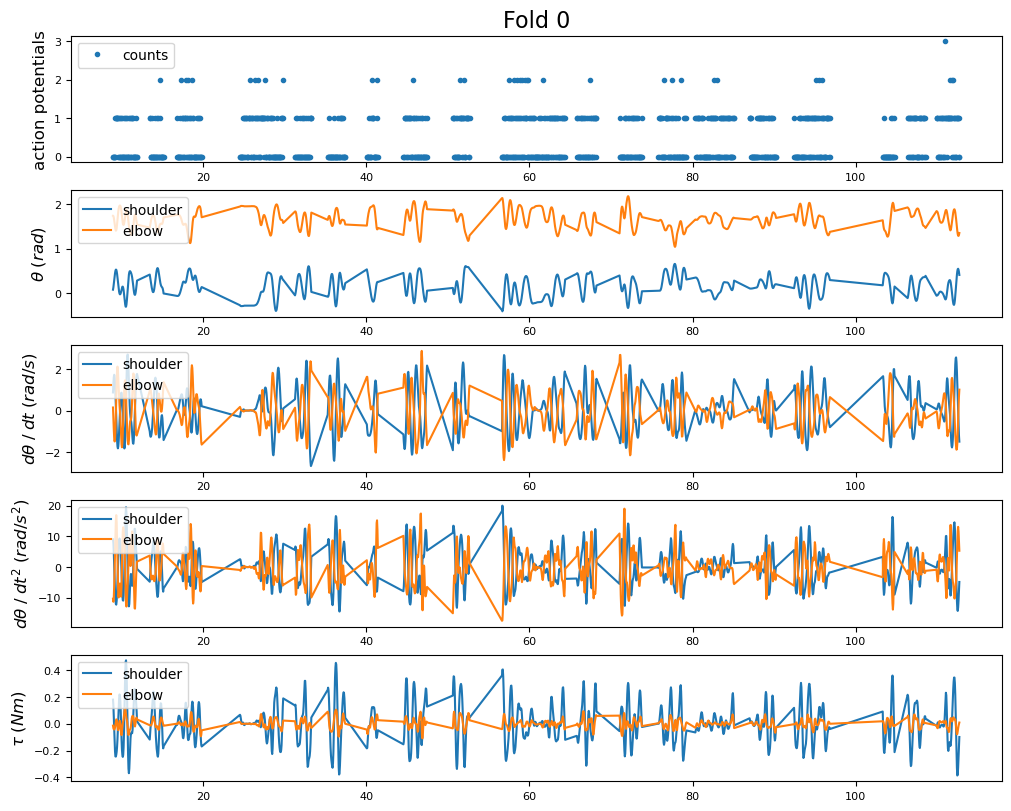

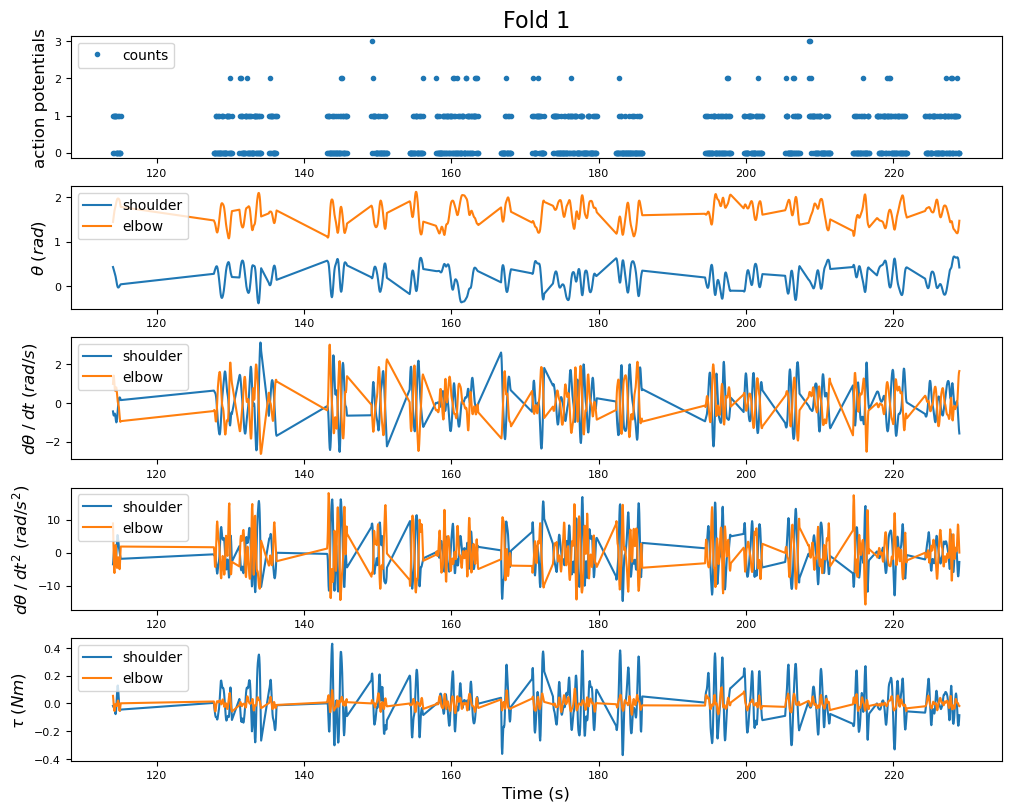

In [154]:
""" PROVIDED: EXECUTE CELL

For the first 2 folds, plot the data for the elbow and shoulder
and from one neuron (pick a random one)
"""
f = 2
n = 20
data_folds = zip(MI_folds[:f], theta_folds[:f], dtheta_folds[:f], 
                 ddtheta_folds[:f], torque_folds[:f], time_folds[:f])

for i, (MI, theta, dtheta, ddtheta, torque, time) in enumerate(data_folds):
    fig, axs = plt.subplots(5, 1)
    axs = axs.ravel()
    
    # Neural Activation Counts
    axs[0].plot(time,MI[:,n], '.', label='counts')
    axs[0].set_title(f"Fold {i}")
    axs[0].set_ylabel("action potentials")
    axs[0].legend(loc='upper left')
    
    lgnd = ['shoulder', 'elbow']
    
    # Position
    axs[1].plot(time, theta)
    axs[1].set_ylabel(r"$\theta \;(rad)$")
    axs[1].legend(lgnd, loc='upper left')
    
    # Velocity
    axs[2].plot(time, dtheta)
    axs[2].set_ylabel(r"$d\theta\; /\; dt \;(rad/s)$")
    axs[2].legend(lgnd, loc='upper left')
    
    # Acceleration
    axs[3].plot(time, ddtheta)
    axs[3].set_ylabel(r"$d\theta\; /\; dt^2 \;(rad/s^2)$")
    axs[3].legend(lgnd, loc='upper left')
    
    # Torque
    axs[4].plot(time, torque)
    axs[4].set_ylabel(r"$\tau \;(Nm)$")
    axs[4].legend(lgnd, loc='upper left')
    if i == (f-1): 
        axs[4].set_xlabel('Time (s)')

# Arm Motion Variables

Text(0, 0.5, 'elbow')

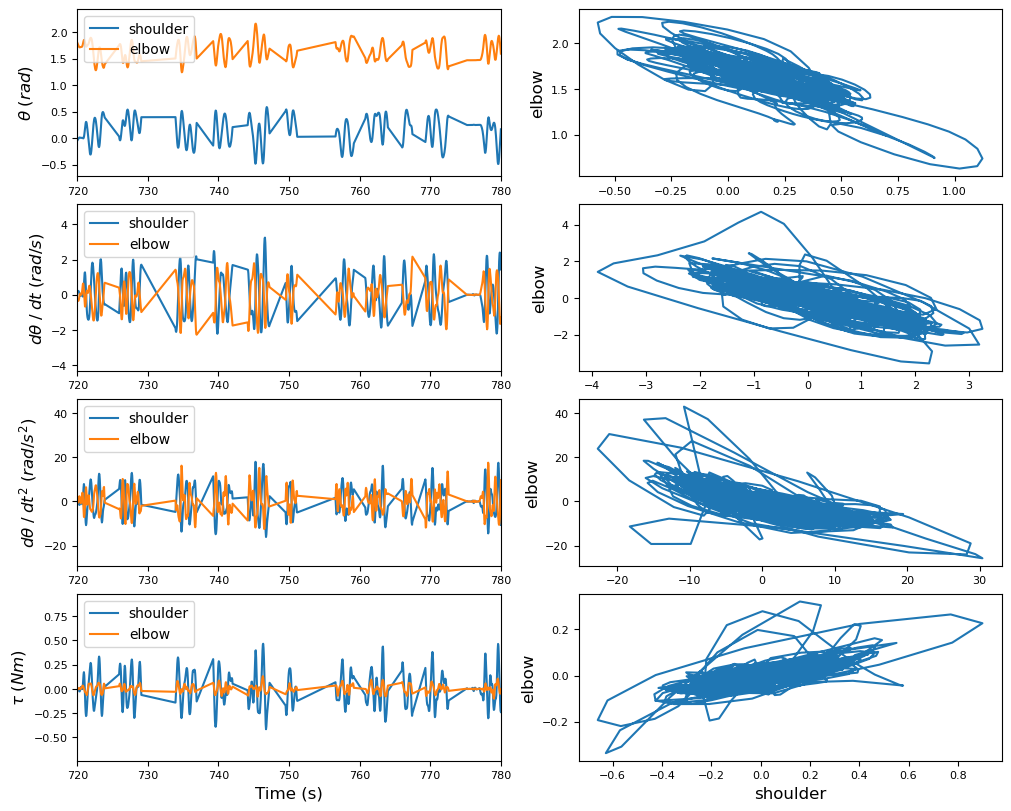

In [155]:
""" PROVIDED: Execute Cell

For fold 5, visualize the relationship between the shoulder
and elbow for:
1. angular position
2. velocity
3. acceleration, and 
4. torque
"""
f = 5

y_pos = theta_folds[f]
y_vel = dtheta_folds[f]
y_accel = ddtheta_folds[f]
y_tor = torque_folds[f]
time = time_folds[f]

nrows = 4
ncols = 2
fig, axs = plt.subplots(nrows, ncols)
#axs = axs.ravel()
xlim = [720, 780]

# POSITION
p = 0
axs[p][0].plot(time, y_pos)
axs[p][0].set_ylabel(r'$\theta \;(rad)$')
axs[p][0].legend(['shoulder', 'elbow'], loc='upper left')
axs[p][0].set_xlim(xlim)

axs[p][1].plot(y_pos[:,0], y_pos[:,1])
axs[p][1].set_ylabel('elbow')

# VELOCITY
p = 1
axs[p][0].plot(time, y_vel)
axs[p][0].set_ylabel(r'$d\theta\;/\;dt\;(rad/s)$')
axs[p][0].legend(['shoulder', 'elbow'], loc='upper left')
axs[p][0].set_xlim(xlim)

#p = 2
axs[p][1].plot(y_vel[:,0], y_vel[:,1])
axs[p][1].set_ylabel('elbow')


# ACCELERATION
p = 2
axs[p][0].plot(time, y_accel)
axs[p][0].set_ylabel(r'$d\theta\;/\;dt^2\;(rad/s^2)$')
axs[p][0].legend(['shoulder', 'elbow'], loc='upper left')
axs[p][0].set_xlim(xlim)

axs[p][1].plot(y_accel[:,0], y_accel[:,1])
axs[p][1].set_ylabel('elbow')


# TORQUE
p = 3
axs[p][0].plot(time, y_tor)
axs[p][0].set_ylabel(r'$\tau \;(Nm)$')
axs[p][0].legend(['shoulder', 'elbow'], loc='upper left')
axs[p][0].set_xlabel('Time (s)')
axs[p][0].set_xlim(xlim)

axs[p][1].plot(y_tor[:,0], y_tor[:,1])
axs[p][1].set_xlabel('shoulder')
axs[p][1].set_ylabel('elbow')

In [156]:
 bmi.keys()

dict_keys(['MI', 'theta', 'dtheta', 'ddtheta', 'torque', 'time'])

## Reflection I

Give short answers to each of the following questions.

_Q1. What is the maximum number of action potentials (spikes) per 50ms bin produced by any neuron in any of the folds?_

**ANS** The maximum number of action potentials (spikes) per 50ms bin provided by any neuron is 12(There is spike in both of the folds).

    while i < len(MI_folds):
    max_spikes = max(max_spikes, np.max(MI_folds[i]))
    i += 1
print(max_spikes)



_Q2. What is the mean number of action potentials over all neurons and time steps across all folds? [note that since the number of samples per fold can differ, giving the mean of means will not give the precise answer]_

**ANS** The mean number of action potentials over all neurons and time steps acroos all folds is : 0.5215459608261024.
        Here is the calculation: 
         total = 0
         nsamples = 0
         for i in MI_folds:
             total += np.sum(i)
             nsamples += i.size
         print(total / nsamples)


_Q3. Which of the shoulder and elbow exhibits higher torque magnitudes in general?  Why?_

**ANS** From the plot, we could say that the shoulder exhibits higher torque magnitudes than the elbow because it typically handles greater forces and a larger range of motion, requiring more torque to control or generate movement and also we can clearly observe a larger fluctuations in shoulder when compared with that of elbow.

_Q4. Are the shoulder torque and acceleration signals positively, negatively or not corellated?  What is the Pearson's R statistic for this pair of signals for fold 6?_

**ANS** The Pearson's R value for the shoulder torque and acceleration signals in fold 6 is 0.9716112145702677, which indicates a strong positive correlation between them and also it indicates that when the torque increases, acceleration also increases with it.

from scipy.stats import pearsonr
print(pearsonr(torque_folds[6][:, 0], ddtheta_folds[6][:, 0]))
PearsonRResult(statistic=0.9716112145702677, pvalue=0.0)

# REGRESSION


## Support Functions

In [157]:
""" TODO
Support functions to evaluate the training performance of an already trained model
"""


def predict_score_eval(model, X, y, convert_deg=False):
    '''
    # TODO: finish implementation
    
    Compute the model predictions and cooresponding scores.
    PARAMS:
        model: the trained model used to make predicitons
        X: feature data (MxN)
        y: desired output (Mxk)
        convert_deg: Boolean flag to indicate whether rmse should be
            converted from rad to deg
            
    RETURNS:
        mse: mean squared error for each column (k vector)
        rmse: rMSE (k vector)
        fvaf: fraction of variance accounted for metric (k vector)
        preds: predictions made by the model (M x k matrix)
    '''
    # use the model to predict the outputs from the input data
    preds =  model.predict(X)# TODO
    
    # TODO: compute VAR/MSE/RMSE
    mse = np.mean((y - preds) ** 2, axis=0)#TODO 
    var = np.var(y, axis=0)

    fvaf =  1 - (mse / var)
    
    rmse = np.sqrt(mse)#TODO
    
    if convert_deg:
         rmse = np.degrees(rmse)#TODO

    return mse, rmse, fvaf, preds, var

def plot_timeseries(time, y, preds, xlim=None, titles = ['Shoulder', 'Elbow'], 
                    vertical_label='set me', convert_deg=False):
    """ TODO
    For each predicted dimension, plot the true signal and the predicted signal 
    as a function of time. Use one subplot per output dimension

    Set horizontal range to the specified xlim

    PARAMS:
        time: Vector of timestamps (one for each sample)
        y: Matrix of true values (M x k matrix)
        preds: Matrix of predicted values (M x k matrix)
        xlim: Horizontal axis limit (None means no limit)
        titles: List of titles (list of k items)
        vertical_label: Text label for the vertical axis
        convert_deg: Boolean flag that indicates that the values should be converted
            from radians to degrees before being plotted.
    
    """
    
    if convert_deg:
        y = np.degrees(y)
        preds = np.degrees(preds)# TODO

    # TODO: Generate the plots
    n_predictors = y.shape[1]
    fig = plt.figure()
    for i in range(n_predictors):
        plt.subplot(n_predictors,1, i+1)
        plt.plot(time, y[:, i], label='True', color='blue')
        plt.plot(time, preds[:, i], label='Predicted', color='orange')

        if xlim is not None:
            plt.xlim(xlim)
        #TODO
        plt.legend()
        plt.title(titles[i])
        plt.ylabel(vertical_label)
        plt.xlim(xlim)

In [158]:
""" 
TODO

Pipeline component object: Estimator and Transformer.

Applies a power transformation to the individual elements of a numpy array.

    Returns a numpy array of the same shape.  For each element x of the array:
        x -> x^exponent

"""
class PowerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, exponent=1):
        """
        Initializes the transformer with an exponent, defaulting to 1.
        """
        self.exponent = exponent
    
    def fit(self, X, y=None):
        """
        This transformer doesn't need to 'fit' anything from the data, 
        so we just return the object itself.
        """
        return self
    
    def transform(self, X):
        """
        Applies the power transformation: raises each element of the input array 
        to the specified exponent.
        """
        # Convert input to a numpy array if it's not already
        X = np.asarray(X)
        
        # Perform the transformation
        X_transformed = np.power(X, self.exponent)
        
        return X_transformed

## Training
Predict joint velocity of the shoulder and the elbow from the neural activations

In [159]:
""" TODO
Create a Pipeline that is composed of:
- PowerTransformer with exponent = 0.5
- StandardScaler()
- LinearRegression() 

Train the pipeline with fold 10.

Note that we are performing multi-regression
"""
fold_idx = 10

X = bmi['MI'][fold_idx]# TODO
y = bmi['dtheta'][fold_idx]# TODO
time = bmi['time'][fold_idx] # TODO


pipe1 = Pipeline([
    ('power_transformer', PowerTransformer(exponent=0.5)),  # PowerTransformer with exponent = 0.5
    ('standard_scaler', StandardScaler()),  # StandardScaler()
    ('linear_regression', LinearRegression()) # LinearRegression()
])

pipe1.fit(X, y)

Pipeline(steps=[('power_transformer', PowerTransformer(exponent=0.5)),
                ('standard_scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [160]:
# PROVIDED: Execute Cell
X.shape, y.shape

((1265, 960), (1265, 2))

In [161]:
""" TODO
Evaluate the training performace of the model, using predict_score_eval()
Print the results displaying MSE, rMSE (in deg/s), and the 
Fraction of Variance Accounted For.  Make sure to include units!
"""
# TODO: call predict_score_eval() and get the corresponding outputs
mse, rmse, fvaf, preds, var = predict_score_eval(pipe1, X, y, convert_deg=True)# TODO

print("Training Performance of the Model:")
for i in range(len(mse)):
    print(f"Performance {i}: {'Shoulder' if i == 0 else 'Elbow' }")
    print(f"  Mean Squared Error (MSE): {mse[i]} ((rad/sec)^2)")
    print(f"  Root Mean Squared Error (RMSE): {rmse[i]} (deg/s)")
    print(f"  Fraction of Variance Accounted For (FVAF): {fvaf[i]}")

Training Performance of the Model:
Performance 0: Shoulder
  Mean Squared Error (MSE): 0.03670375940103309 ((rad/sec)^2)
  Root Mean Squared Error (RMSE): 10.976854487102154 (deg/s)
  Fraction of Variance Accounted For (FVAF): 0.9720117342394011
Performance 1: Elbow
  Mean Squared Error (MSE): 0.06890909735153818 ((rad/sec)^2)
  Root Mean Squared Error (RMSE): 15.040452864166257 (deg/s)
  Fraction of Variance Accounted For (FVAF): 0.9335041627723987


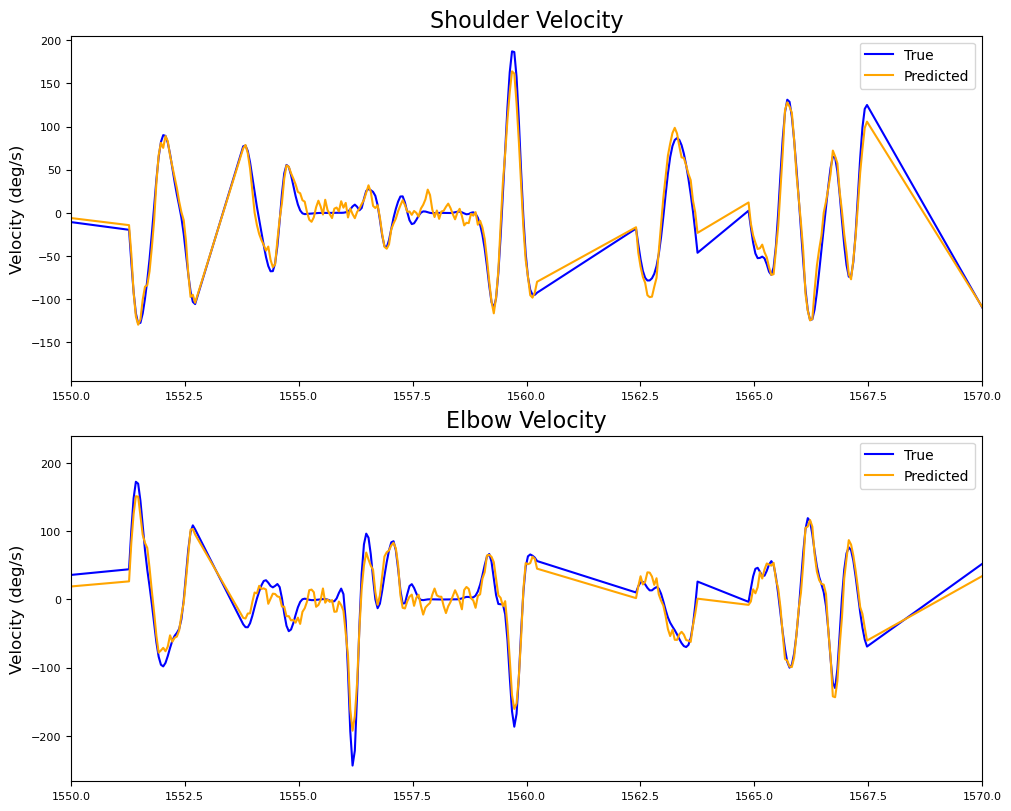

In [162]:
""" TODO
Use the above helper function to plot the true and predicted signals as a function of time 
from t=1550 to 1570.  Use units deg/s in your plot
"""
plot_timeseries(
    time,            
    y,               
    preds,           
    xlim=(1550,1570),       
    titles=['Shoulder Velocity', 'Elbow Velocity'],  
    vertical_label='Velocity (deg/s)',  
    convert_deg=True
)#TODO

### Testing

In [163]:
""" TODO
Evaluate the performace of the above model on unseen data from fold 0.
Print the results displaying MSE, rMSE (deg/s), and 
the FVAF.  Include your units.
"""

ft = 0
Xtest = MI_folds[ft]
ytest = dtheta_folds[ft]
time_test = time_folds[ft]

(
    mse_test, 
    rmse_test,
    fvaf_test, 
    preds_test,
    var_test
) = predict_score_eval(pipe1, Xtest, ytest, convert_deg=True)

# TODO: print the results of predict_score_eval()
# print("Performance of the Model on unseen data from fold 0:")
# print(f"Mean Squared Error (MSE): {mse_test} ((rad/sec)^2)")
# print(f"Root Mean Squared Error (rMSE): {rmse_test} (deg/s)")
# print(f"Fraction of Variance Accounted For (FVAF): {fvaf_test}")

for i in range(len(mse_test)):
    print(f"Performance {i}: {'Shoulder' if i == 0 else 'Elbow' }")
    print(f"  Mean Squared Error (MSE): {mse_test[i]} ((rad/sec)^2)")
    print(f"  Root Mean Squared Error (RMSE): {rmse_test[i]} (deg/s)")
    print(f"  Fraction of Variance Accounted For (FVAF): {fvaf_test[i]}")

Performance 0: Shoulder
  Mean Squared Error (MSE): 0.8585475058539792 ((rad/sec)^2)
  Root Mean Squared Error (RMSE): 53.08903091980666 (deg/s)
  Fraction of Variance Accounted For (FVAF): 0.13600063285360398
Performance 1: Elbow
  Mean Squared Error (MSE): 1.3247784238263247 ((rad/sec)^2)
  Root Mean Squared Error (RMSE): 65.94688030601303 (deg/s)
  Fraction of Variance Accounted For (FVAF): -0.8472512956068396


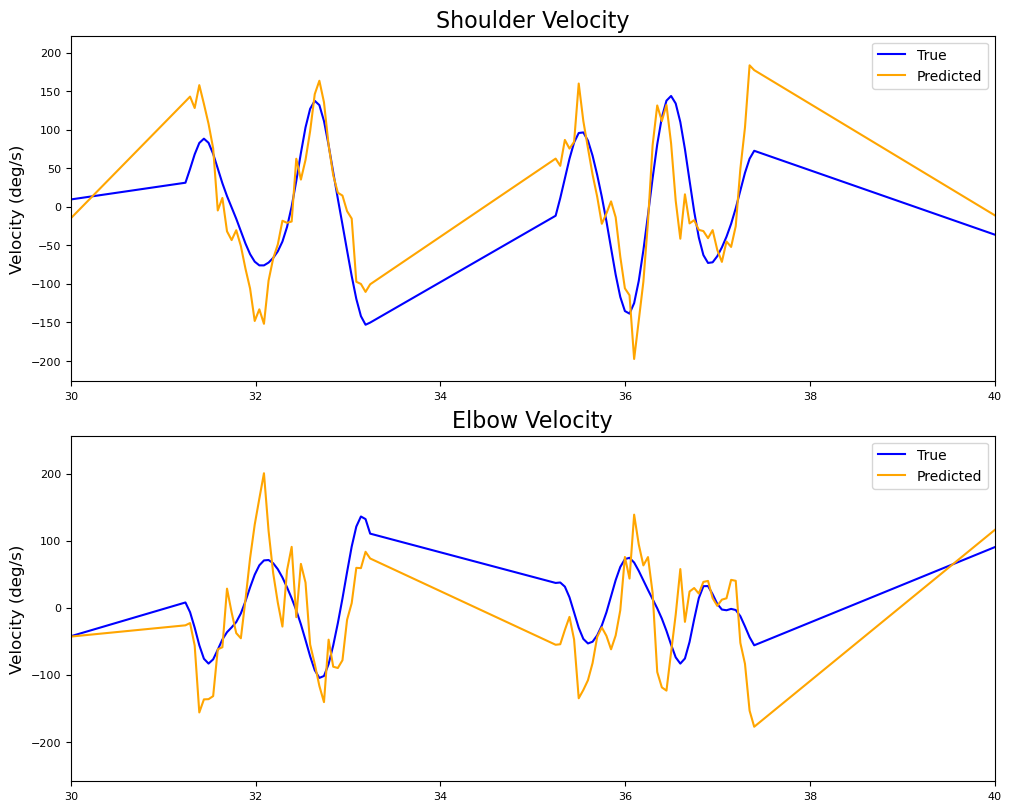

In [164]:
""" TODO
Use the above helper function to plot the true and predicted signals as a 
function of time from t=30 to t=40.  Use units deg/s in your plot
"""

# TODO
plot_timeseries(
    time_test,            
    ytest,               
    preds_test,           
    xlim=(30,40),       
    titles=['Shoulder Velocity', 'Elbow Velocity'],  
    vertical_label='Velocity (deg/s)',  
    convert_deg=True
)

## Reflection II
Provide short answers to the following questions.

_Q5.  Which degree of freedom (shoulder or elbow) does the learned model perform best with with respect to the validation data set?  Explain._

**ANS** 
The model performs better at capturing shoulder movements, as its predictions are more aligned with the actual values and show fewer noticeable errors, even when the velocity changes quickly. In contrast, the elbow predictions are less accurate, with larger gaps between predicted and actual values. Overall, the model has an RMSE of 53.09 deg/s for the shoulder and 65.95 deg/s for the elbow, indicating better performance for the shoulder based on RMSE.


_Q6. Does the addition of the PowerTransformer improve the performance on the validation data? [Note: when you submit your notebook, make sure that the PowerTransformer is in place and used for the results in the above cells.]_

**ANS** Using the PowerTransformer improves the model's performance for the shoulder, making it more accurate and better at capturing variations in the data. However, for the elbow, the transformation has the opposite effect, slightly worsening the results and making it harder for the model to capture elbow movements accurately. In summary, the PowerTransformer helps with shoulder predictions but slightly reduces accuracy for the elbow.


# Training Size Sensitivity
For this section, you will be training a model using different numbers of folds.  Each model will be validated using the same, unseen data set.  

In [165]:
""" TODO
Fill in the missing lines of code
"""
def training_set_size_loop(model, X, y, folds_inds, val_fold_idx,
                          convert_deg=False):
    '''
    Train a model on multiple training set sizes
    
    PARAMS:
        model: object to train
        X: input data (a list of folds)
        y: output data (a list of folds)
        folds_inds: list of the number of folds to use for different 
                    training sets
        val_fold_idx: fold index to use as the validation set. This
                      must be greater than the max value of
                      folds_inds
        convert_deg: Boolean flag that indicates whether to convert from radians to degrees
    
    RETURNS:
        rmse_train, fvaf_train: matrices representing training set performance (nexp x 2)
        rmse_valid, fvaf_valid: matrices representing validation set performance (nexp x 2)

    For a training set size of F folds, the training set will be composed of the 
         first F folds in the folds list
    '''
    # Create matrices to record performance metrics
    nexps = len(folds_inds)
    nstats = y[0].shape[1]
    
    # Pre-allocate the numpy arrays that will store the results
    rmse_train_all = np.empty((nexps, nstats))
    rmse_valid_all = np.empty((nexps, nstats))
    fvaf_train_all = np.empty((nexps, nstats))
    fvaf_valid_all = np.empty((nexps, nstats))
    
    # Data used for validation
    Xval = X[val_fold_idx]
    yval = y[val_fold_idx]
    
    # Loop over the different experiments.  Each experiment has a differnet number of folds
    for i,F in enumerate(folds_inds):
        print('N Folds:', F)
        
        # Clone the base model
        model_tmp = copy.deepcopy(model)
        
        # Construct training set: folds 0, 1, ... F-1
        Xtrain = np.concatenate(X[:F])
        ytrain = np.concatenate(y[:F])
        
        # TODO: Train the model
        #TODO
        model_tmp.fit(Xtrain, ytrain)
        # TODO: call predict_score_eval using the training data
        #TODO
        mse_train, rmse_train, fvaf_train, preds_train, var_train = predict_score_eval(
            model_tmp, Xtrain, ytrain, convert_deg=convert_deg
        )
        # TODO: call predict_score_eval using the validation data
        #TODO
        mse_val, rmse_val, fvaf_val, preds_val, var_val = predict_score_eval(
            model_tmp, Xval, yval, convert_deg=convert_deg
        )

        # Record the performance metrics for this experiment
        rmse_train_all[i, :] = rmse_train
        fvaf_train_all[i, :] = fvaf_train
        rmse_valid_all[i, :] = rmse_val
        fvaf_valid_all[i, :] = fvaf_val
        
    return rmse_train_all, fvaf_train_all, rmse_valid_all, fvaf_valid_all

In [166]:
""" TODO 
Create a new linear model pipeline and train the model using different training set sizes, 
with training sets of sizes 1,2,3,5,7,10,14,18, and with fold 19 as the val_fold_idx.

The input data is the MI data and the output data is angular acceleration for both the 
shoulder and elbow.
""" 
val_fold = 19
training_sizes = [1, 2, 3, 5, 7, 10, 14, 18]

# TODO: Create a new Pipeline model (same structure as above)
pipe2 = Pipeline([
    ('power_transformer', PowerTransformer(exponent=0.5)),  # PowerTransformer with exponent = 0.5
    ('standard_scaler', StandardScaler()),  # StandardScaler()
    ('linear_regression', LinearRegression()) # LinearRegression()
]) # TODO

# TODO: Collect the RMSE and FVAF for shoulder and elbow for different size training sets
X = MI_folds
y = ddtheta_folds

rmse_train, fvaf_train, rmse_valid, fvaf_valid = training_set_size_loop( pipe2, X,y,training_sizes,val_fold,convert_deg=True) # TODO

N Folds: 1
N Folds: 2
N Folds: 3
N Folds: 5
N Folds: 7
N Folds: 10
N Folds: 14
N Folds: 18


/tmp/ipykernel_65/898227151.py:53: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


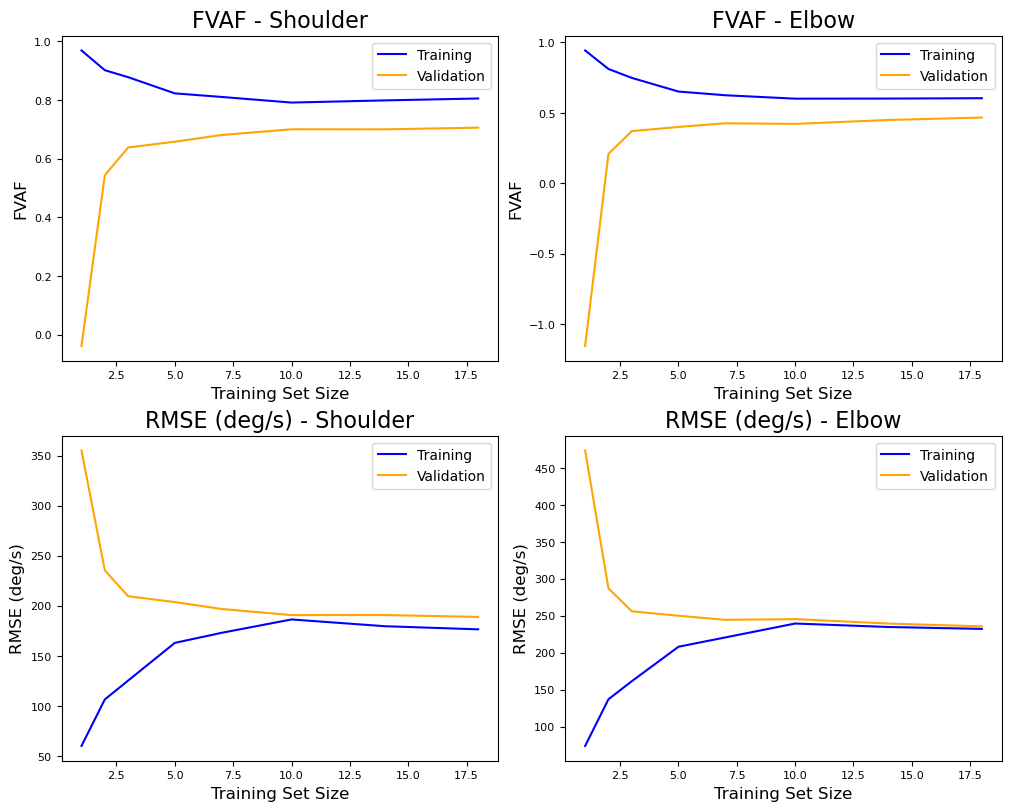

In [167]:
""" TODO
Create 2x2 grid of four plots: FVAF (row 1) and RMSE-deg (row 2) for both 
shoulder (column 1) and elbow (column 2).

For each plot, show the metric for both the training and validation data sets 
as a function of training set size

Make sure to include appropriate titles and labels

"""
titles = ['Shoulder', 'Elbow']

fig = plt.figure()

plt.subplot(2, 2, 1)
# TODO
plt.plot(training_sizes, fvaf_train[:, 0], label='Training', color='blue')
plt.plot(training_sizes, fvaf_valid[:, 0], label='Validation', color='orange')
plt.title(f'FVAF - {titles[0]}')
plt.xlabel('Training Set Size')
plt.ylabel('FVAF')
plt.legend()

plt.subplot(2, 2, 2)
# TODO
plt.plot(training_sizes, fvaf_train[:, 1], label='Training', color='blue')
plt.plot(training_sizes, fvaf_valid[:, 1], label='Validation', color='orange')
plt.title(f'FVAF - {titles[1]}')
plt.xlabel('Training Set Size')
plt.ylabel('FVAF')
plt.legend()


plt.subplot(2, 2, 3)
# TODO
plt.plot(training_sizes, rmse_train[:, 0], label='Training', color='blue')
plt.plot(training_sizes, rmse_valid[:, 0], label='Validation', color='orange')
plt.title(f'RMSE (deg/s) - {titles[0]}')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE (deg/s)')
plt.legend()


plt.subplot(2, 2, 4)
# TODO
plt.plot(training_sizes, rmse_train[:, 1], label='Training', color='blue')
plt.plot(training_sizes, rmse_valid[:, 1], label='Validation', color='orange')
plt.title(f'RMSE (deg/s) - {titles[1]}')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE (deg/s)')
plt.legend()

plt.tight_layout()
plt.show()

## Reflection III

_Q7. Does training FVAF increase or decrease with increasing training set size?  Why?_

**ANS** As the training set gets bigger, the Fraction of Variance Accounted For (FVAF) decreases for both the shoulder and elbow. This happens because more data helps the model recognize patterns better, which improves its ability to explain the variance in the data. In short, the model becomes better at learning relationships with a larger training set, leading to an increase in FVAF.


_Q8. Does the validation set RMSE increase or decrease with increasing training set size?  Why?_

**ANS** As the training set gets bigger, the validation set RMSE typically goes down because the model learns better patterns from more data, which helps it make more accurate predictions and reduces overfitting.

_Q9. What is the minimum number of training folds that result in the best model (for this case)?_

**ANS** The best model is achieved with at least 10 training folds, as both the validation RMSE and FVAF stabilize, showing little improvement beyond that point.
